In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from main import get_market_data
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
market_data = get_market_data() #Movements, O, H, L, C

- 2MX.PA: No data found, symbol may be delisted
- ASP.PA: No data found, symbol may be delisted
- ACNV.PA: No data found, symbol may be delisted
- ABIO.PA: No data found, symbol may be delisted
- CDANV.PA: No data found, symbol may be delisted
- ALMDS.PA: No data found, symbol may be delisted
- ALM.PA: No data found, symbol may be delisted
- ATA.PA: No data found, symbol may be delisted
- FBEL.PA: No data found, symbol may be delisted
- CAPLI.PA: No data found, symbol may be delisted
- CGGBS.PA: No data found, symbol may be delisted
- CNP.PA: No data found, symbol may be delisted
- DLTA.PA: No data found, symbol may be delisted
- DVT.PA: No data found, symbol may be delisted
- DGM.PA: No data found, symbol may be delisted
- GID.PA: No data found, symbol may be delisted
- ECP.PA: No data found, symbol may be delisted
- EUCAR.PA: No data found, symbol may be delisted
- FAUV.PA: No data found, symbol may be delisted
- FPN.PA: No data found, symbol may be delisted
- FATL.PA: No data found,

In [ ]:
#voir lien feature selection github

#1 ecrire sur le doc le plan de clustering et d'analyse de correlation pr chaque cluster et de la distribuytion des resultats
#winsoring et retester avec rentabilités simples et prix simple
#voir si pca change qqch

#une fois que c bon implementer ratios a la main et voir deature selection sur le medium

#clustering sur plusieurs unités de temps (1y, 2y ,6m, 3m)
#feature extraction tsfresh?
essayer softdtw

In [221]:
def winsorize_col(s):
    return winsorize(s, limits=[0.005,0.005])

def pca_analysis(df, min_variance=95, lookback = 365,):
    cluster_db = df.iloc[:,-lookback:]
    scaler = StandardScaler()
    scaler.fit(cluster_db)    
    #normalize data
    cluster_db = scaler.transform(cluster_db)
    pca = PCA(n_components = cluster_db_norm.shape[1])
    pca.fit(cluster_db)
    eigen_values, eigein_values_ratio = pca.explained_variance_, pca.explained_variance_ratio_
    plt.plot(eigen_values,alpha=0.5)
    print(f'Keyser : {len(eigen_values[eigen_values > 1])}, {min_variance} % of variance : {len(eigein_values_ratio.cumsum()[eigein_values_ratio.cumsum() < min_variance/100])}')

def pca_df(df, n_comp):
    pca = PCA(n_components = n_comp)
    pca.fit(df)
    df_pca = pd.DataFrame(pca.transform(df), index =df.index)
    return df_pca

def get_elbow_curve(df, min_cluster = 2, max_clusters = 30):
    inertia = np.array([])
    for k in tqdm(range(min_cluster, max_clusters)):
        inertia = np.append(inertia, TimeSeriesKMeans(n_clusters=k, metric='dtw').fit(df).inertia_)
    plt.plot(inertia)
    return inertia

returns = market_data[4].pct_change().iloc[1:,:]
price_change = market_data[0]
returns_win = returns.apply(winsorize_col, axis=0).T
price_change_win = price_change.apply(winsorize_col, axis=0).T
returns=returns.T
price_change=price_change.T

Keyser : 31, 90 % of variance : 23


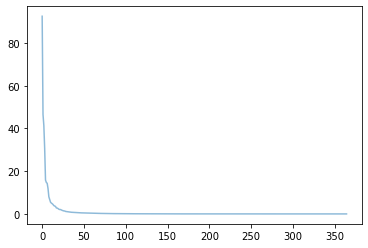

In [216]:
pca_analysis(price_change_win, min_variance=90)

In [217]:
pca_df(price_change_win, 31)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
2CRSI.PA,-4.467625,-3.324673,-1.461774,-8.866944,-1.090666,-0.158209,-1.321478,-1.601407,1.218268,-2.492583,-0.055785,-0.581213,0.231853,-0.551129,-0.527311,-1.135203,-0.193691,0.818520,-0.266149,-2.011208,0.888758,-0.478873,0.429623,-0.533562,-0.004126,-0.413474,0.026696,-0.744471,0.317191,-0.383230,0.020977
AB.PA,-4.288068,-3.478997,-1.458579,-8.046368,-1.300182,-0.221850,-0.706139,-1.507356,0.999247,-1.247943,-0.333242,0.004521,-0.217999,0.133785,-0.283715,-0.908905,-0.364595,0.563838,-0.482362,-2.000313,0.908219,-0.115137,0.283305,-0.334988,0.001717,-0.684859,0.150814,-0.623987,0.761342,-0.648108,0.179868
ABCA.PA,-4.475031,-3.588459,-1.479199,-9.340919,-0.959772,-0.426059,-1.332013,-1.698223,1.420065,-2.714175,-0.085054,-0.647739,-0.044151,-0.363533,-0.663818,-1.033536,-0.400890,0.870892,-0.130075,-2.232326,1.192229,-0.631178,0.698922,-0.320451,-0.441898,-0.607049,-0.196570,-0.635696,0.513929,-0.183538,-0.080937
ABEO.PA,-4.118905,-3.255000,-1.677250,-8.996036,-1.484056,0.319733,-0.949887,-0.307877,0.808631,-2.301514,-0.439313,-0.722597,-0.213733,-0.077512,-0.322927,-0.738039,-0.142080,1.018519,0.189975,-1.538311,1.191442,-0.261979,0.755750,0.174874,-0.508571,0.073224,0.119875,-0.548705,1.164707,0.193099,-0.113517
ABNX.PA,-4.419359,-3.328221,-1.477025,-9.222269,-0.928399,-0.574922,-1.256306,-1.781063,1.494637,-2.733127,-0.117576,-0.682198,-0.016799,-0.344482,-0.578605,-1.204010,-0.203329,0.876130,-0.167954,-2.395863,0.967704,-0.548270,0.618983,-0.372440,-0.336901,-0.579085,-0.193364,-0.792889,0.337677,-0.206387,-0.099425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENGI.PA,-4.283339,-3.316113,-1.507174,-8.100137,-0.872592,-0.315324,-1.561248,-1.366648,0.530641,-2.103517,-0.252316,-0.897875,-0.166915,-0.208870,-0.599433,-1.017951,-0.201782,0.172622,-0.236240,-1.203542,0.928164,-0.519429,-0.070423,0.362378,-0.516467,-0.417782,-0.307149,-0.879075,0.109346,-0.431853,0.126051
ENX.PA,-4.055012,-2.573634,-1.900811,1.264459,-2.037241,-2.936658,-1.004520,-0.742339,5.489992,4.993432,0.618750,-0.467253,0.289747,-3.253645,-0.087264,0.189291,-0.998917,-1.150700,-0.042568,1.480870,0.550491,0.154842,-0.799259,1.489611,2.488504,-2.060765,3.706350,0.201490,-2.369840,-1.522398,-1.085260
SGO.PA,-2.662561,-2.978858,-1.785427,0.740942,-1.304693,0.120421,-1.439825,-0.124560,-2.934969,1.800848,-0.532884,-0.408632,0.044928,-0.426538,-0.629784,-0.003590,-0.847032,-2.059434,-0.229090,1.886763,-2.068747,1.994126,-0.742704,-1.908159,0.966443,1.002178,-0.302528,0.692475,1.537719,-0.815120,0.234815
TTE.PA,-3.421400,-2.036139,-1.988739,-5.802214,-1.292289,1.492462,-0.687015,-0.191468,-4.774868,-0.618638,-0.115355,0.135524,-0.540701,0.836143,1.257508,-1.193706,0.182863,-1.261130,-0.948175,1.525945,-2.302845,1.407495,-0.973605,0.558971,0.458028,-2.226033,-3.036039,1.797328,-1.134435,1.982976,-0.405720


In [ ]:
get_elbow_curve(pca_df(returns_win, 31))

 32%|███▏      | 9/28 [01:17<03:15, 10.28s/it]

In [243]:
from sklearn.preprocessing import Normalizer
def get_labels(df, n_clust, lookback = 365):
    cluster_labels = TimeSeriesKMeans(n_clusters=n_clust, metric="dtw", n_init=25).fit(df.iloc[:,-lookback:])
    cluster_labels = pd.Series(cluster_labels.labels_, index = df.index)
    return cluster_labels

def print_cluster_results(cluster_labels, lookback = 365):
    #scale prices for visualisation
    normalizer = Normalizer()
    euronext_close = market_data[4].T
    normalizer.fit(euronext_close.iloc[:,-lookback:])
    normalized_prices = pd.DataFrame(normalizer.fit_transform(euronext_close.iloc[:,-lookback:]), index = euronext_close.index)
    plt.plot(normalized_prices[cluster_labels==3].T)
    print(cluster_labels.value_counts())

In [235]:
labels_pca31 = get_labels(pca_df(price_change_win, 31), n_clust=7)
labels_pca31 = get_labels(pca_df(price_change_win, 31), n_clust=10)
labels_pca31 = get_labels(pca_df(price_change_win, 31), n_clust=17)
labels_pca31 = get_labels(pca_df(price_change_win, 31), n_clust=25)

0    344
5     12
4      3
6      3
1      2
3      2
2      1
dtype: int64


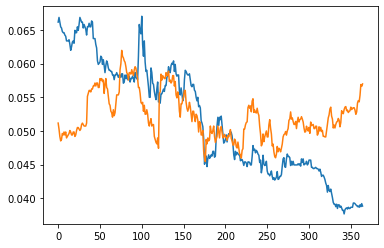

In [244]:
print_cluster_results(labels_pca31)

In [ ]:
faire tests avec returns 

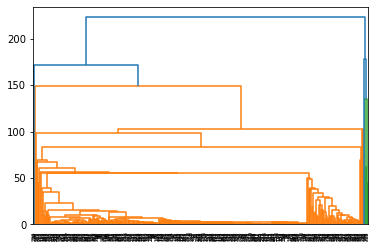

In [9]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

dendrogram_2021 = sch.dendrogram(sch.linkage(cluster_db_pca, method='ward'))
linkage = sch.linkage(cluster_db_pca,method='ward',optimal_ordering=True)

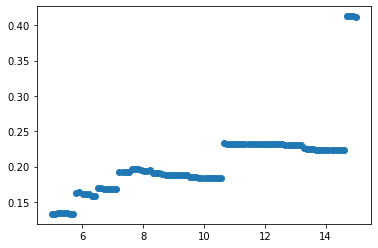

In [129]:
from sklearn.metrics import silhouette_score
plot = []
for i in np.linspace(5, 15, num=100):
    plot.append([i, silhouette_score(X=cluster_db,labels=fcluster(linkage,t=i,criterion='distance'))])
x, y = np.array(plot).T
plt.scatter(x, y)

In [130]:
plot

[[5.0, 0.13308634793312177],
 [5.101010101010101, 0.13308634793312177],
 [5.202020202020202, 0.13411120781390037],
 [5.303030303030303, 0.13411120781390037],
 [5.404040404040404, 0.13411120781390037],
 [5.505050505050505, 0.13411120781390037],
 [5.606060606060606, 0.133328066235819],
 [5.707070707070707, 0.133328066235819],
 [5.808080808080808, 0.1633029315670466],
 [5.909090909090909, 0.16341636875296528],
 [6.01010101010101, 0.1606743948019143],
 [6.111111111111111, 0.16146619241833035],
 [6.212121212121212, 0.16140887700488077],
 [6.313131313131313, 0.1579424658728449],
 [6.414141414141414, 0.1579424658728449],
 [6.515151515151516, 0.1692932185912836],
 [6.616161616161616, 0.1692932185912836],
 [6.717171717171717, 0.1679539341605607],
 [6.818181818181818, 0.1679539341605607],
 [6.919191919191919, 0.1679539341605607],
 [7.020202020202021, 0.1679539341605607],
 [7.121212121212121, 0.16773747730190097],
 [7.222222222222222, 0.19221501678667646],
 [7.3232323232323235, 0.1922150167866764

In [138]:
pd.DataFrame(elbow.labels_).value_counts()

0    359
1      8
dtype: int64

In [136]:
cluster_db['DWT kmeans'].value_counts()

0     313
8      29
6       8
7       4
2       3
4       3
1       1
3       1
5       1
9       1
10      1
11      1
12      1
Name: DWT kmeans, dtype: int64

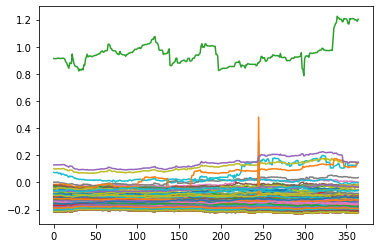

In [134]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(euronext_close.iloc[:,-365:])
euronext_norm = pd.DataFrame(normalizer.fit_transform(euronext_close.iloc[:,-365:]), index = euronext_close.index)
cluster_db['DWT kmeans'] = pd.Series(elbow.labels_, index=cluster_db.index)
plt.plot(euronext_norm[cluster_db['CAH PCA 15']==8].T)


In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count=13))
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))

In [121]:
cluster_db["CAH PCA 14"] = pd.Series(fcluster(linkage,t=14,criterion='distance'), index=cluster_db.index)

In [113]:
cluster_db

date,2021-07-05 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00,2021-07-29 00:00:00,2021-07-30 00:00:00,2021-08-02 00:00:00,2021-08-03 00:00:00,2021-08-04 00:00:00,2021-08-05 00:00:00,2021-08-06 00:00:00,2021-08-09 00:00:00,2021-08-10 00:00:00,2021-08-11 00:00:00,2021-08-12 00:00:00,2021-08-13 00:00:00,2021-08-16 00:00:00,2021-08-17 00:00:00,2021-08-18 00:00:00,2021-08-19 00:00:00,2021-08-20 00:00:00,2021-08-23 00:00:00,2021-08-24 00:00:00,2021-08-25 00:00:00,2021-08-26 00:00:00,2021-08-27 00:00:00,...,2022-10-07 00:00:00,2022-10-10 00:00:00,2022-10-11 00:00:00,2022-10-12 00:00:00,2022-10-13 00:00:00,2022-10-14 00:00:00,2022-10-17 00:00:00,2022-10-18 00:00:00,2022-10-19 00:00:00,2022-10-20 00:00:00,2022-10-21 00:00:00,2022-10-24 00:00:00,2022-10-25 00:00:00,2022-10-26 00:00:00,2022-10-27 00:00:00,2022-10-28 00:00:00,2022-10-31 00:00:00,2022-11-01 00:00:00,2022-11-02 00:00:00,2022-11-03 00:00:00,2022-11-04 00:00:00,2022-11-07 00:00:00,2022-11-08 00:00:00,2022-11-09 00:00:00,2022-11-10 00:00:00,2022-11-11 00:00:00,2022-11-14 00:00:00,2022-11-15 00:00:00,2022-11-16 00:00:00,2022-11-17 00:00:00,2022-11-18 00:00:00,2022-11-21 00:00:00,2022-11-22 00:00:00,2022-11-23 00:00:00,2022-11-24 00:00:00,2022-11-25 00:00:00,2022-11-28 00:00:00,DWT kmeans,CAH PCA 54,CAH PCA 28
2CRSI.PA,0.020000,-0.060000,-0.110000,-0.240000,-0.030000,-0.065000,-0.190000,0.085000,-0.020000,0.185000,-0.200000,0.000000,0.015000,0.000000e+00,1.200001e-01,0.100000,-0.175000,-0.060000,0.010000,0.075000,0.035000,0.155000,-0.020000,-0.080000,-0.140000,0.115000,-0.010000,-0.030000,-0.015000,0.025000,0.020000,-0.070000,0.035000,-0.140000,0.020000,0.080000,0.105000,-0.055000,-0.130000,-7.999992e-02,...,0.180000,0.015000,-0.075000,-0.080000,-0.050000,0.110000,0.040000,0.050000,0.000000,-0.040000,-0.080000,0.050000,0.010000,-0.015000,-0.050000,-0.085000,-0.035000,0.010000,0.030000,0.030000,-0.010000,0.090000,-0.010000,0.020000,0.050000,0.200000,0.030000,0.000000,-0.090000,-0.070000,0.025000,-0.060000,0.025000,0.005000,0.000000,0.000000,0.140000,0,6,7
AB.PA,0.425000,-0.285000,-0.375000,-0.410001,-0.280001,-0.759999,1.010000,2.320000,-1.500000,0.370001,1.280001,1.480000,-0.630000,-5.600004e-01,5.100002e-01,-0.530000,-0.320000,0.099999,-0.290000,-0.020000,-0.540000,-1.700000,0.030001,-0.309999,0.000000,1.430000,-0.430000,0.270000,-0.130000,0.060000,-0.100000,0.260000,0.910000,-0.349999,0.250000,-0.700001,-0.300000,0.000000,-0.390000,-7.000065e-02,...,-0.150000,-0.200000,-0.615000,0.000000,0.265000,-0.095000,0.290000,0.010000,-0.015000,0.075001,0.195001,-0.060000,0.010000,0.135000,0.645000,-0.115000,-0.059999,-0.045000,-0.295000,-0.190001,-0.145000,0.080000,-0.125000,-0.335000,0.215000,0.175000,0.145000,-0.325000,-0.330000,0.180000,-0.035000,-0.060000,-0.410000,0.140000,-0.150000,-0.080000,0.339999,0,6,7
ABCA.PA,0.072676,-0.054507,0.072676,-0.072676,-0.018169,0.109014,0.009317,-0.074534,0.000000,-0.074534,-0.018633,-0.083851,0.000000,3.726694e-02,-2.794999e-02,0.009317,0.027950,-0.009317,0.046584,0.037267,0.121118,-0.074534,-0.009317,0.009317,0.065217,0.009317,0.046583,-0.083850,0.027950,-0.046583,0.027950,-0.009317,0.055900,-0.074534,0.009317,0.018633,-0.055900,-0.027950,-0.027950,-6.521693e-02,...,0.137891,-0.059096,-0.070000,0.080000,-0.060000,0.080000,-0.070000,0.080000,-0.010000,-0.050000,-0.100000,-0.050000,0.030000,-0.020000,-0.080000,0.090000,-0.040000,-0.150000,-0.070000,-0.040000,-0.020000,0.040000,-0.060000,0.110000,0.040000,-0.040000,0.000000,0.090000,-0.030000,0.030000,-0.010000,0.010000,-0.100000,-0.010000,0.000000,0.030000,-0.060000,0,6,7
ABEO.PA,0.000000,-1.224937,0.195989,-0.391980,-0.391980,-0.342983,0.979950,0.048997,0.048997,-0.146992,-0.979950,0.391980,0.097995

In [110]:
cluster_db.to_excel('test.xlsx')

In [ ]:
#https://github.com/harshitajpr/Stock-Market-Prediction/blob/master/SARIMA_stock.ipynb